## 1. Data Importing

In [2]:
import pandas as pd
import numpy as np
import math
import io

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

In [11]:
planets = pd.read_csv(r'C:\Users\justi\OneDrive\Rosslife\School of Information\Python Statistic Essentials\Exercise Files\chapter2\02_02\Planets.csv')

In [12]:
planets

,Planet,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
0,MERCURY,0.3300,4879,4222.6,57.9,88,47.4,167,0.00000,0,No,Yes,1974-03-29,Mariner 10
1,VENUS,4.8700,"12,104",2802.0,108.2,224.7,35.0,464,92.00000,0,No,No,1962-08-27,Mariner 2
2,EARTH,5.9700,"12,756",24.0,149.6,365.2,29.8,15,1.00000,1,No,Yes,NaN,NaN
3,MOON,0.0730,3475,708.7,NaN,27.3,1.0,-20,0.00000,0,No,No,1959-09-12,Luna 2
4,MARS,0.6420,6792,24.7,227.9,687,24.1,-65,0.01000,2,No,No,1965-07-15,Mariner 4
5,JUPITER,1898.0000,"142,984",9.9,778.6,4331,13.1,-110,NaN,67,Yes,Yes,1973-12-04,Pioneer 10
6,SATURN,568.0000,"120,536",10.7,1433.5,"10,747",9.7,-140,NaN,62,Yes,Yes,1979-09-01,Pioneer 11
7,URANUS,86.8000,"51,118",17.2,2872.5,"30,589",6.8,-195,NaN,27,Yes,Yes,1986-01-24,Voyager 2
8,NEPTUNE,102.0000,"49,528",16.1,4495.1,"59,800",5.4,-200,NaN,14,Yes,Yes,1989-08-25,Voyager 2
9,PLUTO,0.0146,2370,153.3,5906.4,"90,560",4.7,-225,0.00001,5,No,NaN,2015-07-14,New Horizons


In [13]:
planets_part = pd.read_csv(r'C:\Users\justi\OneDrive\Rosslife\School of Information\Python Statistic Essentials\Exercise Files\chapter2\02_02\Planets.csv', usecols = [0,1,2,3])

In [14]:
planets_part

,Planet,Mass,Diameter,DayLength
0,MERCURY,0.3300,4879,4222.6
1,VENUS,4.8700,"12,104",2802.0
2,EARTH,5.9700,"12,756",24.0
3,MOON,0.0730,3475,708.7
4,MARS,0.6420,6792,24.7
5,JUPITER,1898.0000,"142,984",9.9
6,SATURN,568.0000,"120,536",10.7
7,URANUS,86.8000,"51,118",17.2
8,NEPTUNE,102.0000,"49,528",16.1
9,PLUTO,0.0146,2370,153.3


In [15]:
planets.Mass

0       0.3300
1       4.8700
2       5.9700
3       0.0730
4       0.6420
5    1898.0000
6     568.0000
7      86.8000
8     102.0000
9       0.0146
Name: Mass, dtype: float64

In [16]:
planets.index

RangeIndex(start=0, stop=10, step=1)

In [17]:
planets.loc[0]

Planet                MERCURY
Mass                     0.33
Diameter                 4879
DayLength              4222.6
SunDistance              57.9
OrbitPeriod                88
OrbitVelocity            47.4
MeanTemperature           167
SurfacePressure             0
Moons                       0
Rings                      No
MagneticField             Yes
FirstVisited       1974-03-29
FirstMission       Mariner 10
Name: 0, dtype: object

In [20]:
planets.set_index('Planet', inplace = True)

In [21]:
planets

,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
Planet,,,,,,,,,,,,,
MERCURY,0.3300,4879,4222.6,57.9,88,47.4,167,0.00000,0,No,Yes,1974-03-29,Mariner 10
VENUS,4.8700,"12,104",2802.0,108.2,224.7,35.0,464,92.00000,0,No,No,1962-08-27,Mariner 2
EARTH,5.9700,"12,756",24.0,149.6,365.2,29.8,15,1.00000,1,No,Yes,NaN,NaN
MOON,0.0730,3475,708.7,NaN,27.3,1.0,-20,0.00000,0,No,No,1959-09-12,Luna 2
MARS,0.6420,6792,24.7,227.9,687,24.1,-65,0.01000,2,No,No,1965-07-15,Mariner 4
JUPITER,1898.0000,"142,984",9.9,778.6,4331,13.1,-110,NaN,67,Yes,Yes,1973-12-04,Pioneer 10
SATURN,568.0000,"120,536",10.7,1433.5,"10,747",9.7,-140,NaN,62,Yes,Yes,1979-09-01,Pioneer 11
URANUS,86.8000,"51,118",17.2,2872.5,"30,589",6.8,-195,NaN,27,Yes,Yes,1986-01-24,Voyager 2
NEPTUNE,102.0000,"49,528",16.1,4495.1,"59,800",5.4,-200,NaN,14,Yes,Yes,1989-08-25,Voyager 2


In [24]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, MERCURY to PLUTO
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mass             10 non-null     float64
 1   Diameter         10 non-null     object 
 2   DayLength        10 non-null     float64
 3   SunDistance      9 non-null      float64
 4   OrbitPeriod      10 non-null     object 
 5   OrbitVelocity    10 non-null     float64
 6   MeanTemperature  10 non-null     int64  
 7   SurfacePressure  6 non-null      float64
 8   Moons            10 non-null     int64  
 9   Rings            10 non-null     object 
 10  MagneticField    9 non-null      object 
 11  FirstVisited     9 non-null      object 
 12  FirstMission     9 non-null      object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1.1+ KB


In [26]:
planets.loc['VENUS']

Mass                     4.87
Diameter               12,104
DayLength                2802
SunDistance             108.2
OrbitPeriod             224.7
OrbitVelocity              35
MeanTemperature           464
SurfacePressure            92
Moons                       0
Rings                      No
MagneticField              No
FirstVisited       1962-08-27
FirstMission        Mariner 2
Name: VENUS, dtype: object

In [27]:
planets.loc['MERCURY':'EARTH']

,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
Planet,,,,,,,,,,,,,
MERCURY,0.33,4879,4222.6,57.9,88,47.4,167,0.0,0,No,Yes,1974-03-29,Mariner 10
VENUS,4.87,"12,104",2802.0,108.2,224.7,35.0,464,92.0,0,No,No,1962-08-27,Mariner 2
EARTH,5.97,"12,756",24.0,149.6,365.2,29.8,15,1.0,1,No,Yes,NaN,NaN


In [29]:
#1 
planets.DayLength['MERCURY']

4222.6

In [30]:
#2
planets.loc['MERCURY'].FirstVisited

'1974-03-29'

In [32]:
#3
planets.loc['MERCURY', 'OrbitPeriod']

'88'

In [35]:
type(planets.loc['MERCURY', 'FirstVisited'])

str

In [55]:
planets['FirstVisited'] = pd.to_datetime(planets['FirstVisited'])

In [56]:
type(planets.FirstVisited['VENUS'])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
2020 - planets.FirstVisited.dt.year

Planet
MERCURY    46.0
VENUS      58.0
EARTH       NaN
MOON       61.0
MARS       55.0
JUPITER    47.0
SATURN     41.0
URANUS     34.0
NEPTUNE    31.0
PLUTO       5.0
Name: FirstVisited, dtype: float64

## 2. Data Cleaning

In [61]:
billboard = pd.read_csv(r'C:\Users\justi\OneDrive\Rosslife\School of Information\Python Statistic Essentials\Exercise Files\chapter2\02_04\billboard.csv',  encoding= 'unicode_escape')

In [65]:
!file r'C:\Users\justi\OneDrive\Rosslife\School of Information\Python Statistic Essentials\Exercise Files\chapter2\02_04\billboard.csv'

file: could not find any valid magic files!


In [62]:
billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

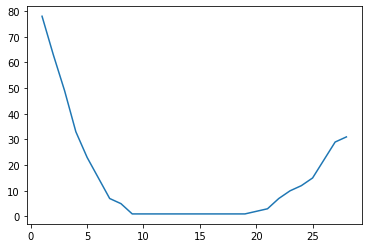

In [68]:
pp.plot(range(1,77), billboard.loc[0, 'x1st.week':'x76th.week'])

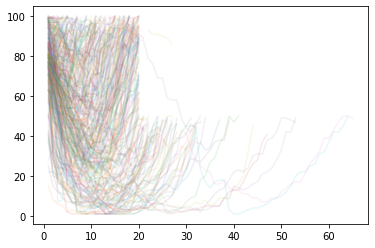

In [74]:
for index, row in billboard.iterrows():
    pp.plot(range(1,77), row['x1st.week':'x76th.week'], alpha = 0.1)

In [ ]:
billboard.

#### Cleaning a subset of data with 'Melt' method 

In [76]:
bshort = billboard[['artist.inverted', 'track', 'time','date.entered', 'x1st.week', 'x2nd.week', 'x3rd.week']]

In [79]:
bshort

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0
...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,98,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,2000-02-12,99,99.0,99.0
314,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN
315,"Eastsidaz, The",Got Beef,3:58,2000-07-01,99,99.0,NaN


In [80]:
bshort.columns = ['artist', 'track', 'time', 'date.entered', 'week1', 'week2', 'week3']

In [81]:
bshort.head()

,artist,track,time,date.entered,week1,week2,week3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [87]:
# melt(): inside ([identifier variables], [observation columns], name of newly added column, name of the values column ) = 
bshort_melt = bshort.melt(['artist','track','time','date.entered'], ['week1','week2','week3'],'week', 'rank')

In [88]:
bshort_melt

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,week1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,week1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,week1,71.0
3,Madonna,Music,3:45,2000-08-12,week1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,week1,57.0
...,...,...,...,...,...,...
946,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,week3,NaN
947,"Smith, Will",Freakin' It,3:58,2000-02-12,week3,99.0
948,Zombie Nation,Kernkraft 400,3:30,2000-09-02,week3,NaN
949,"Eastsidaz, The",Got Beef,3:58,2000-07-01,week3,NaN


#### Melting the entier data

In [106]:
billboard_melt = billboard.melt(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked'], billboard.columns[7:82], 'week', 'rank')

In [103]:
billboard_melt

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
23770,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,x75th.week,NaN
23771,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,x75th.week,NaN
23772,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,x75th.week,NaN
23773,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,x75th.week,NaN


Convert 'week' str to int

In [108]:
billboard_melt.week = billboard_melt.week.str[1].astype(int)
# another way
billboard_melt.week = billboard_melt['week'].apply(lambda s: int(s[1]))

In [109]:
billboard_melt

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...,...,...,...
23770,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,7,NaN
23771,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,7,NaN
23772,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,7,NaN
23773,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,7,NaN


Convert date formated columns to datetime 

In [235]:
billboard_melt['date.entered'] = pd.to_datetime(billboard_melt['date.entered'])
billboard_melt['date.peaked'] = pd.to_datetime(billboard_melt['date.peaked'])

In [236]:
billboard_melt['date.peaked'][0] 

Timestamp('2000-11-18 00:00:00')

In [237]:
billboard_melt.query('track == "Liar"')

,year,artist,track,time,genre,date.entered,date.peaked,week,rank
66,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,1,52.0
383,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,2,32.0
700,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,3,25.0
1017,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,4,17.0
1334,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,5,16.0
...,...,...,...,...,...,...,...,...,...
22256,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,7,NaN
22573,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,7,NaN
22890,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,7,NaN
23207,2000,Profyle,Liar,3:57,R&B,2000-09-16,2000-10-28,7,NaN


In [238]:
billboard_melt.rename(columns = {'artist.inverted': 'artist'}, inplace=True)

In [239]:
billboard_cleaned = billboard_melt.sort_values(['artist','track'])
billboard_cleaned

,year,artist,track,time,genre,date.entered,date.peaked,week,rank
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,1,87.0
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,2,82.0
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,3,72.0
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,4,77.0
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,2000-03-11,5,87.0
...,...,...,...,...,...,...,...,...,...
22205,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,7,NaN
22522,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,7,NaN
22839,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,7,NaN
23156,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22,7,NaN


Store track information in a seperate datatable and create index for each track

In [240]:
# Seperate out track information first
tracks = billboard_cleaned[['artist','track','time']].drop_duplicates() 

In [241]:
tracks

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35
...,...,...,...
254,Yankee Grey,Another Nine Minutes,3:10
277,"Yearwood, Trisha",Real Live Woman,3:55
251,Ying Yang Twins,Whistle While You Twurk,4:19
314,Zombie Nation,Kernkraft 400,3:30


In [242]:
# Give unique index
tracks.index.name = 'id'
tracks = tracks.reset_index()

In [243]:
tracks

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35
...,...,...,...,...
312,254,Yankee Grey,Another Nine Minutes,3:10
313,277,"Yearwood, Trisha",Real Live Woman,3:55
314,251,Ying Yang Twins,Whistle While You Twurk,4:19
315,314,Zombie Nation,Kernkraft 400,3:30


In [244]:
tracks.query('id == 613')

,id,artist,track,time


In [245]:
# Merge again with billobard chart information
total_bb_index = pd.merge(tracks, billboard_melt, on = ['track', 'artist', 'time'] )

In [246]:
total_bb_index

,id,artist,track,time,year,genre,date.entered,date.peaked,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,3,72.0
3,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,4,77.0
4,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,5,87.0
...,...,...,...,...,...,...,...,...,...,...
23770,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,7,NaN
23771,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,7,NaN
23772,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,7,NaN
23773,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,7,NaN


In [247]:
total_bb_index.query('id == 613')

,id,artist,track,time,year,genre,date.entered,date.peaked,week,rank


Drop NaN

In [248]:
total_bb_index['rank'].isnull().values.sum()

18468

In [249]:
total_bb_index['rank'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
23770     True
23771     True
23772     True
23773     True
23774     True
Name: rank, Length: 23775, dtype: bool

In [250]:
cleaned_total_bb = total_bb_index.dropna()

In [251]:
cleaned_total_bb

,id,artist,track,time,year,genre,date.entered,date.peaked,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,3,72.0
3,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,4,77.0
4,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000,Rap,2000-02-26,2000-03-11,5,87.0
...,...,...,...,...,...,...,...,...,...,...
23734,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,3,33.0
23735,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,3,37.0
23736,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,3,38.0
23737,15,matchbox twenty,Bent,4:12,2000,Rock,2000-04-29,2000-07-22,3,38.0


In [252]:
# Drop information about track
bb_index = cleaned_total_bb.drop(['artist', 'track', 'time', 'genre', 'date.entered', 'date.peaked'], axis=1)

In [253]:
bb_index

,id,year,week,rank
0,246,2000,1,87.0
1,246,2000,2,82.0
2,246,2000,3,72.0
3,246,2000,4,77.0
4,246,2000,5,87.0
...,...,...,...,...
23734,15,2000,3,33.0
23735,15,2000,3,37.0
23736,15,2000,3,38.0
23737,15,2000,3,38.0


But my questions is how can there be many ranks of the same track in a week?

In [254]:
cleaned_total_bb.sort_values(['week', 'id'])

,id,artist,track,time,year,genre,date.entered,date.peaked,week,rank
5550,0,Destiny's Child,Independent Women Part I,3:38,2000,Rock,2000-09-23,2000-11-18,1,78.0
5559,0,Destiny's Child,Independent Women Part I,3:38,2000,Rock,2000-09-23,2000-11-18,1,1.0
5560,0,Destiny's Child,Independent Women Part I,3:38,2000,Rock,2000-09-23,2000-11-18,1,1.0
5561,0,Destiny's Child,Independent Women Part I,3:38,2000,Rock,2000-09-23,2000-11-18,1,1.0
5562,0,Destiny's Child,Independent Women Part I,3:38,2000,Rock,2000-09-23,2000-11-18,1,1.0
...,...,...,...,...,...,...,...,...,...,...
14183,288,Madison Avenue,Don't Call Me Baby,3:44,2000,Electronica,2000-07-08,2000-09-16,9,90.0
13283,290,Limp Bizkit,Re-Arranged,4:08,2000,Rock,1999-12-04,2000-02-05,9,92.0
17033,292,Nu Flavor,3 Little Words,3:54,2000,R&B,2000-06-03,2000-06-17,9,98.0
8783,295,"Hart, Beth",L.A. Song,3:47,2000,Country,1999-11-27,2000-01-15,9,99.0


In [255]:
bb_index

,id,year,week,rank
0,246,2000,1,87.0
1,246,2000,2,82.0
2,246,2000,3,72.0
3,246,2000,4,77.0
4,246,2000,5,87.0
...,...,...,...,...
23734,15,2000,3,33.0
23735,15,2000,3,37.0
23736,15,2000,3,38.0
23737,15,2000,3,38.0


## 3. Data Exploration

###### What was the song that ranked the highest in Week 1?

In [256]:
# Find the index of the song
bb_index[bb_index.week == 1]['rank'].idxmin()

613

In [257]:
# Look at the rank
bb_index.loc[bb_index[bb_index.week == 1]['rank'].idxmin()]

id        14.0
year    2000.0
week       1.0
rank       1.0
Name: 613, dtype: float64

In [261]:
tracks.query('id == 14')

,id,artist,track,time
8,14,Aaliyah,Try Again,4:03


###### What is the average life of songs in Billboard?

In [270]:
bb_index_avg_week = bb_index.groupby('id').mean()[['week']]

In [273]:
bb_index_avg_week.mean()

week    3.143551
dtype: float64